<a href="https://colab.research.google.com/github/MicroprocessorX069/Generalized-Bayes-classifier-/blob/master/Bayes_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## imports

In [0]:
def write_requirements(dict_libraries,dir=""):
  import os
  requirements=""
  for library_name, library in dict_libraries.items():
    requirements+=library_name+"=="+str(library.__version__)+"\n"

  text_file = open(os.path.join(dir,"requirements.txt"), "w")
  n = text_file.write(requirements)
  text_file.close()


In [0]:
libraries_dict={}
import scipy.io
libraries_dict["scipy"]=scipy
import numpy as np
libraries_dict["numpy"]=np
import matplotlib
import matplotlib.pyplot as plt
libraries_dict["matplotlib"]=matplotlib

import math 


write_requirements(libraries_dict)

## utils

In [0]:
#Return a numpy arrary of the matrix
def read_mat_file(file_dir):
  data = scipy.io.loadmat(file_dir)
  return data

def std_normalize(mat,mean, std_dev):
  '''
  Returns standard normalized matrix
  z=(x-mean)/std_dev
  '''
  mat=(mat-mean)/std_dev
  return mat

def get_normal_prob(mean, std_dev, test):
    prob = test - mean
    prob = np.multiply(prob,prob)
    prob = -1 * prob / (2 * np.multiply(std_dev,std_dev))
    prob = np.exp(prob)
    prob = prob/(math.sqrt(math.pi*2)*std_dev)
    #prob = np.prod(prob, axis = 1)
    return prob

def predict(variables):
  # Outputs the class predicted
  prob=[get_normal_prob(variables['m_std_train']['f1'][i]['m'],\
                        variables['m_std_train']['f1'][i]['std'],
                        variables['test_data']) \
        for i in range(5)]
  return np.argmax(prob,axis=0)


def get_mean_std(array):
  # m: mean ; std: standard deviation
  dict={'m':np.mean(array),'std':np.std(array)}
  return dict

def get_accuracy(predicted):
  n_samples=predicted.shape[0]
  ground_truth=np.array([[0,1,2,3,4] for _ in range(n_samples)])
  from sklearn import metrics
  from sklearn.metrics import accuracy_score
  acc = np.mean(np.array([accuracy_score(predicted[:,i],ground_truth[:,i]) for i in range(5)]))
  print("Accuracy: {:.2f} Error rate: {:.2f} \n".format(acc,1-acc))
  return acc

def plot_clustered_graph(x,y,c,name="image.png",labels=None):
  classes = ['C1','C2','C3','C4','C5']
  #colors = [plt.cm.jet(i/float(len(unique)-1)) for i in range(len(unique))]

  scatter=plt.scatter(x, y, c=c,label=c)
  plt.legend(handles=scatter.legend_elements()[0], labels=classes)
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.grid(True)
  plt.show()
  
  #plt.save(name)

def get_multivariate_pdf(mean, cov, test):
  from scipy.stats import multivariate_normal
  import numpy as np
  y = multivariate_normal.pdf(test, mean=mean, cov=cov)
  return y

class Bayes_Classifier(object):
    """This is a bayes classifier, which predicts classes 
        based on the mean and standard deviations of a feature.

    Attributes:
        name: A string representing the customer's name.
        balance: A float tracking the current balance of the customer's account.
    """

    def __init__(self, data, train_size=100):

        self.data = data
        self.n_samples = data.shape[0]
        self.train_size=train_size
        self.test_data=data[train_size:]
        #self.m_std_train, self.predicted, self.accuracy=
        self.m_std_train={}
        self.ground_truth=np.array([[0,1,2,3,4] for _ in range(self.n_samples)])

    def train(self):
        self.m_std_train={'f1':{0:get_mean_std(self.data[:self.train_size,0]), 
               1:get_mean_std(self.data[:self.train_size,1]), 
               2:get_mean_std(self.data[:self.train_size,2]),   
               3:get_mean_std(self.data[:self.train_size,3]), 
               4:get_mean_std(self.data[:self.train_size,4])}, 
         'f2':{0:get_mean_std(self.data[:self.train_size,0]), 
               1:get_mean_std(self.data[:self.train_size,1]), 
               2:get_mean_std(self.data[:self.train_size,2]),   
               3:get_mean_std(self.data[:self.train_size,3]), 
               4:get_mean_std(self.data[:self.train_size,4])}}
        return self.m_std_train
        
        
    def predict(self):
      # Outputs the class predicted
      prob=[get_normal_prob(self.m_std_train['f1'][i]['m'],\
                            self.m_std_train['f1'][i]['std'],
                            self.test_data) \
            for i in range(5)]
      return np.argmax(prob,axis=0)

    def validate(self,predicted):
      
      from sklearn import metrics
      from sklearn.metrics import accuracy_score
      acc = np.mean(np.array([accuracy_score(predicted[:,i],self.ground_truth[self.train_size:,i]) for i in range(5)]))
      print("Accuracy: {:.2f} Error rate: {:.2f} \n".format(acc,1-acc))
      return acc

    def scatter_plot(x,y,c):
      fig, ax = plt.subplots()
      scatter = ax.scatter(x, y, c=c)
      ax.legend()
      ax.grid(True)
      plt.show()

class Multivariate_Bayes_Classifier(object):
  def __init__(self,data,train_size=100):
    self.data=data
    #self.feature_values = np.fromiter(self.data.values(),dtype=float)
    self.feature_values=np.array(list(self.data.values()))
    self.feature_names=np.array(list(self.data.keys()))
    self.train_size=train_size
    print("Dataset shape: ",self.feature_values.shape)
    self.n_features=self.feature_values.shape[0]
    self.n_samples=self.feature_values.shape[1]
    self.n_classes=self.feature_values.shape[2]
    self.ground_truth=np.array([[0,1,2,3,4] for _ in range(self.n_samples)])

  def train(self):

    self.m_std_train={}
    for class_i in range(self.n_classes):
      temp={'m':[],'cov':[]}
      for feature_name, feature_mat in self.data.items():
        temp['m'].append(np.mean(self.data[feature_name][:self.train_size, class_i]))
      temp['cov']=np.cov(self.data[self.feature_names[0]][:self.train_size, class_i],self.data[self.feature_names[1]][:self.train_size, class_i])
      temp['m']=np.array(temp['m'])
      self.m_std_train[class_i]=temp

    self.test_data=[]
    for sample_i in range(self.n_samples):
      temp_sample=[]
      for class_i in range(self.n_classes):
        temp_val=[]
        for feature_name, feature_mat in self.data.items():
          temp_val.append(feature_mat[sample_i][class_i])
        temp_sample.append(np.array(temp_val))
      self.test_data.append(temp_sample)
    self.test_data=np.array(self.test_data)[self.train_size:]

  def predict(self):
    prob=np.array([get_multivariate_pdf(self.m_std_train[i]['m'],\
                            self.m_std_train[i]['cov'], \
                            self.test_data) \
            for i in range(self.n_classes)])
    return np.argmax(prob,axis=0)

  def validate(self,predicted):
    from sklearn import metrics
    from sklearn.metrics import accuracy_score
    acc = np.mean(np.array([accuracy_score(predicted[:,i],self.ground_truth[self.train_size:,i]) for i in range(5)]))
    print("Accuracy: {:.2f} Error rate: {:.2f} \n".format(acc,1-acc))
    return acc



def main(variables):
  data=read_mat_file(variables["data_path"])
  f1_data,f2_data=np.array(data['F1']),np.array(data['F2'])
  n_samples=f1_data.shape[0]
  ground_truth=np.array([[0,1,2,3,4] for _ in range(n_samples)])
  print("About the data")
  print("Source of data: ",variables["data_path"])
  print("Classes of data: 0,1,2,3,4")
  print("No. of samples: ",n_samples,"\n")

  
  #Training on 100 samples
  
  #m_std is dictionary of f1, f2 for each column, c1 c2 c3 c4 and c5.
  print("\n---------- Section 1: Training -------------")
  print("\n Calculating the means and standard deviations for 100 samples\n")
  train_size=variables['training_size']
  b1=Bayes_Classifier(f1_data,train_size)
  m_std_train=b1.train()

  ## Section 2.1: Testing  
  print("\n---------- Section 2.1: Testing -------------")
  print("\n Predicting the classes for 101: 1000 samples")

  predicted=b1.predict()

  ## Section 2.2: Calculating accuracy and error rate
  print("\n---------- Section 2.2: Calculating accuracy for the classifier -------------")
  print("\nAccuracy for the Bayes classifier: ")
  acc=b1.validate(predicted)

  ## Section 3: Standard Normal (z score)
  print("---------- Section 3: Standard normal(Z Score) -------------")

  # z1_data is the standard normalized data.
  z1_data=np.swapaxes(np.array([std_normalize(f1_data[:,i],m_std_train['f1'][i]['m'],\
                        m_std_train['f1'][i]['std']) 
          for i in range(5)]),0,1)
  print("Plot of Z1 vs F2")
  plot_clustered_graph(z1_data.flatten(),f2_data.flatten(),ground_truth.flatten(),name="z1vsf2.png",labels=['z1','f2'])

  # z1_data is the standard normalized data.
  print("\n Plot of F1 vs F2")
  plot_clustered_graph(f1_data.flatten(),f2_data.flatten(),ground_truth.flatten(),name="f1vsf2.png",labels=['f1','f2'])

  ## Section 4
  ### Case 1: Training with the z1 data
  print("\n---------- Section 4, Case 2: Training with the z1 data -------------")
  b=Bayes_Classifier(z1_data)
  b.train()
  predicted=b.predict()
  acc=b.validate(predicted)

  print("\n---------- Section 4, Case 3: Training with the f2 data -------------")
  b=Bayes_Classifier(f2_data)
  b.train()
  predicted=b.predict()
  acc=b.validate(predicted)

  print("\n---------- Section 4, Case 4: Training with the [z1, f2] data -------------")
  data={'z1':z1_data,'f2':f2_data}
  b=Multivariate_Bayes_Classifier(data)
  b.train()
  predicted=b.predict()
  acc=b.validate(predicted)






## main

About the data
Source of data:  data.mat
Classes of data: 0,1,2,3,4
No. of samples:  1000 


---------- Section 1: Training -------------

 Calculating the means and standard deviations for 100 samples


---------- Section 2.1: Testing -------------

 Predicting the classes for 101: 1000 samples

---------- Section 2.2: Calculating accuracy for the classifier -------------

Accuracy for the Bayes classifier: 
Accuracy: 0.53 Error rate: 0.47 

---------- Section 3: Standard normal(Z Score) -------------
Plot of Z1 vs F2


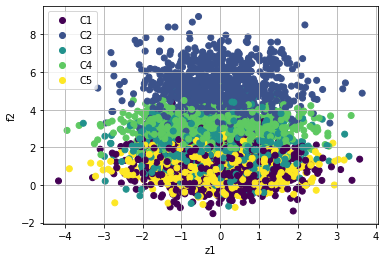


 Plot of F1 vs F2


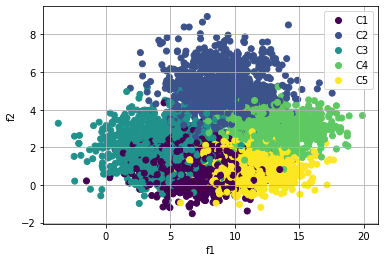


---------- Section 4, Case 2: Training with the z1 data -------------
Accuracy: 0.20 Error rate: 0.80 


---------- Section 4, Case 3: Training with the f2 data -------------
Accuracy: 0.55 Error rate: 0.45 


---------- Section 4, Case 4: Training with the [z1, f2] data -------------
Dataset shape:  (2, 1000, 5)
Accuracy: 0.55 Error rate: 0.45 



In [8]:
data_path="data.mat" # Change data path here if required
# Link to example data file : 
training_size=100
variables={"data_path":data_path, \
           "training_size":training_size, \
           "convert_std_normal": False
           }
main(variables)